CENSUS INCOME PREDICTION MODEL:
    
Here, we have data of Census Income which was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker. 

GOAL:
    
The prediction task is to determine whether a person makes over $50K a year.

Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import StandardScaler # To fit all data on same scale
from sklearn.model_selection import train_test_split # To split data in 2 parts
from sklearn.linear_model import LogisticRegression #models to perform on data
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,f1_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import roc_curve,roc_auc_score

In [2]:
df = pd.read_csv("census_income.csv")
df.head()

#LOAD THE DATASET

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [3]:
df.shape
#we have total 32560 rows and 15 columns

(32560, 15)

In [4]:
df.isnull().sum()
#yeh, data is pretty clean and their is no null values

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In [5]:
num = ['float64','int64']
my_df = df.select_dtypes(include=num)
my_df.sample(n=10)

#all int or float type column

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
17738,42,187294,10,0,0,40
18081,28,190391,13,0,0,50
15070,39,174924,9,14344,0,40
7054,50,133963,9,0,0,35
4068,25,104662,9,0,0,22
21006,61,101265,10,0,0,43
3389,45,214627,16,15020,0,40
16901,52,137428,9,0,0,45
7546,20,141481,7,0,0,50
17389,22,390817,3,0,0,40


In [6]:
objt = ['object']
my_df1 = df.select_dtypes(include=objt)
my_df1.sample(n=10)

#Object type columns

,Workclass,Education,Marital_status,Occupation,Relationship,Race,Sex,Native_country,Income
17572,Local-gov,Some-college,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,>50K
7709,Local-gov,Bachelors,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
29211,Private,Some-college,Never-married,Handlers-cleaners,Other-relative,Black,Male,?,<=50K
3629,Local-gov,Bachelors,Divorced,Prof-specialty,Unmarried,White,Female,United-States,<=50K
4099,Private,Bachelors,Never-married,Craft-repair,Unmarried,White,Male,United-States,<=50K
10406,Private,HS-grad,Never-married,Other-service,Own-child,White,Female,United-States,<=50K
17018,Private,Bachelors,Never-married,Adm-clerical,Own-child,White,Female,United-States,<=50K
10279,Self-emp-inc,HS-grad,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
17880,Private,HS-grad,Widowed,Sales,Not-in-family,White,Female,United-States,<=50K
14115,Private,HS-grad,Never-married,Adm-clerical,Unmarried,White,Female,United-States,<=50K


In [7]:
categorical_df=[j for j in df if df[j].dtype == 'object']

In [8]:
for i in categorical_df:
    columns = df[i].unique()
    print(i,columns)
    
#ALL UNIQUE VALUES IN CATAGORICAL DATA

Workclass [' Self-emp-not-inc' ' Private' ' State-gov' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']
Education [' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']
Marital_status [' Married-civ-spouse' ' Divorced' ' Married-spouse-absent'
 ' Never-married' ' Separated' ' Married-AF-spouse' ' Widowed']
Occupation [' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Adm-clerical' ' Sales' ' Craft-repair'
 ' Transport-moving' ' Farming-fishing' ' Machine-op-inspct'
 ' Tech-support' ' ?' ' Protective-serv' ' Armed-Forces'
 ' Priv-house-serv']
Relationship [' Husband' ' Not-in-family' ' Wife' ' Own-child' ' Unmarried'
 ' Other-relative']
Race [' White' ' Black' ' Asian-Pac-Islander' ' Amer-Indian-Eskimo' ' Other']
Sex [' Male' ' Female']
Native_country [' United-States' ' Cuba' ' Jamaica' ' India' 

Here, we have many unique values so we will sort our data and make it easy

In [9]:
df['Workclass']= df['Workclass'].replace([' State-gov',' Federal-gov',' Local-gov'],['government','government','government'],inplace = False)
df['Workclass']= df['Workclass'].replace([' Self-emp-not-inc',' Self-emp-inc'],['self-employed','self-employed'],inplace = False)
df['Workclass']= df['Workclass'].replace([' ?',' Without-pay',' Never-worked'],['other','other','other'],inplace = False)

In [10]:
df['Workclass'].unique()

array(['self-employed', ' Private', 'government', 'other'], dtype=object)

In [11]:
df['Education']= df['Education'].replace([' Preschool',' 1st-4th',' 5th-6th',' 7th-8th'],['primary','primary','primary','primary'],inplace = False)
df['Education']= df['Education'].replace([' 9th',' 10th',' 11th',' 12th',' HS-grad'],['Secondary','Secondary','Secondary','Secondary','Secondary'],inplace = False)
df['Education']= df['Education'].replace([' Some-college',' Assoc-acdm',' Assoc-voc',' Prof-school',' Doctorate',' Bachelors',' Masters'],['other','other','other','other','other','Bachelors','Masters'],inplace = False)

In [12]:
df['Education'].unique()

array(['Bachelors', 'Secondary', 'Masters', 'other', 'primary'],
      dtype=object)

In [13]:
df['Marital_status']= df['Marital_status'].replace([' Married-civ-spouse',' Married-spouse-absent',' Married-AF-spouse'],['married','married','married'],inplace = False)
df['Marital_status']= df['Marital_status'].replace([' Never-married',' Divorced',' Widowed',' Separated'],['single','other','other','other'],inplace = False)


In [14]:
df['Marital_status'].unique()

array(['married', 'other', 'single'], dtype=object)

In [15]:
df['Occupation']= df['Occupation'].replace([' Adm-clerical',' Prof-specialty',' Exec-managerial'],['class1','class1','class1'],inplace = False)
df['Occupation']= df['Occupation'].replace([' Sales',' Protective-serv',' Tech-support',' Machine-op-inspct'],['class2','class2','class2','class2'],inplace = False)
df['Occupation']= df['Occupation'].replace([' Handlers-cleaners',' ?',' Other-service',' Craft-repair',' Transport-moving',' Farming-fishing',' Armed-Forces',' Priv-house-serv'],['class3','class3','class3','class3','class3','class3','class3','class3'],inplace = False)

In [16]:
df['Occupation'].unique()

array(['class1', 'class3', 'class2'], dtype=object)

In [17]:
df['Relationship']= df['Relationship'].replace([' Husband',' Wife',' Own-child',' Unmarried',' Not-in-family',' Other-relative'],['spouse','spouse','child','single','others','others'],inplace = False)
df['Relationship'].unique()

array(['spouse', 'others', 'child', 'single'], dtype=object)

In [18]:
df['Race']= df['Race'].replace([' White',' Black',' Asian-Pac-Islander',' Amer-Indian-Eskimo',' Other'],['white','black','other','other','other'],inplace = False)
df['Race'].unique()

array(['white', 'black', 'other'], dtype=object)

In [19]:
df['Sex']= df['Sex'].replace([' Male',' Female'],['male','female'],inplace = False)
df['Sex'].unique()

array(['male', 'female'], dtype=object)

In [20]:
df.Native_country = df.Native_country.str.replace(' ', '')
df.Income  = df.Income .str.replace(' ', '')

In [21]:
df['Native_country'].unique()

array(['United-States', 'Cuba', 'Jamaica', 'India', '?', 'Mexico',
       'South', 'Puerto-Rico', 'Honduras', 'England', 'Canada', 'Germany',
       'Iran', 'Philippines', 'Italy', 'Poland', 'Columbia', 'Cambodia',
       'Thailand', 'Ecuador', 'Laos', 'Taiwan', 'Haiti', 'Portugal',
       'Dominican-Republic', 'El-Salvador', 'France', 'Guatemala',
       'China', 'Japan', 'Yugoslavia', 'Peru',
       'Outlying-US(Guam-USVI-etc)', 'Scotland', 'Trinadad&Tobago',
       'Greece', 'Nicaragua', 'Vietnam', 'Hong', 'Ireland', 'Hungary',
       'Holand-Netherlands'], dtype=object)

In [22]:
for i in categorical_df:
    columns = df[i].unique()
    print(i,columns)

Workclass ['self-employed' ' Private' 'government' 'other']
Education ['Bachelors' 'Secondary' 'Masters' 'other' 'primary']
Marital_status ['married' 'other' 'single']
Occupation ['class1' 'class3' 'class2']
Relationship ['spouse' 'others' 'child' 'single']
Race ['white' 'black' 'other']
Sex ['male' 'female']
Native_country ['United-States' 'Cuba' 'Jamaica' 'India' '?' 'Mexico' 'South'
 'Puerto-Rico' 'Honduras' 'England' 'Canada' 'Germany' 'Iran'
 'Philippines' 'Italy' 'Poland' 'Columbia' 'Cambodia' 'Thailand' 'Ecuador'
 'Laos' 'Taiwan' 'Haiti' 'Portugal' 'Dominican-Republic' 'El-Salvador'
 'France' 'Guatemala' 'China' 'Japan' 'Yugoslavia' 'Peru'
 'Outlying-US(Guam-USVI-etc)' 'Scotland' 'Trinadad&Tobago' 'Greece'
 'Nicaragua' 'Vietnam' 'Hong' 'Ireland' 'Hungary' 'Holand-Netherlands']
Income ['<=50K' '>50K']


In [23]:
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,self-employed,83311,Bachelors,13,married,class1,spouse,white,male,0,0,13,United-States,<=50K
1,38,Private,215646,Secondary,9,other,class3,others,white,male,0,0,40,United-States,<=50K
2,53,Private,234721,Secondary,7,married,class3,spouse,black,male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,married,class1,spouse,black,female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,married,class1,spouse,white,female,0,0,40,United-States,<=50K


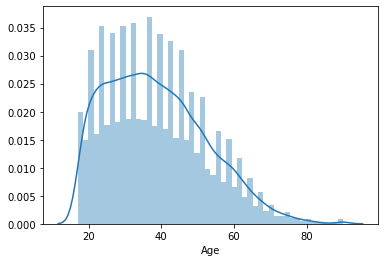

In [24]:
sns.distplot(df['Age'])

#In or dataset, most of inspection is between 20 to 40 year age.

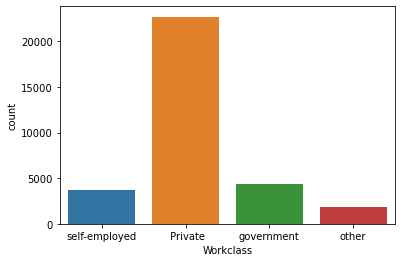

In [25]:
sns.countplot(x ='Workclass', data = df)
plt.show()

In our dataset, Private job employees are in good numbers

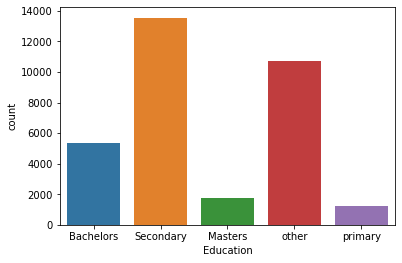

In [26]:
sns.countplot(x ='Education', data = df)
plt.show()

most of people have completed their secondary education only. There are low number of person who have master degree

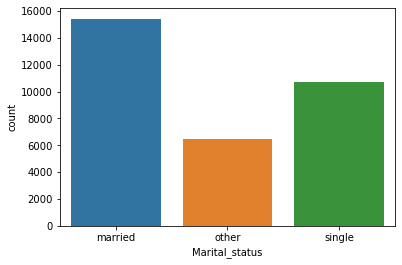

In [27]:
sns.countplot(x ='Marital_status', data = df)
plt.show()

in dataset, there are high number of inspection where people are married

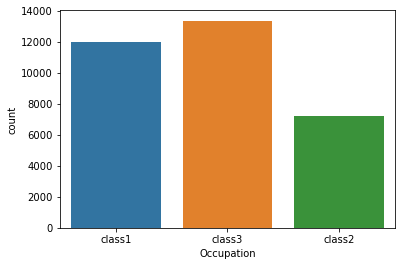

In [28]:
sns.countplot(x ='Occupation', data = df)
plt.show()

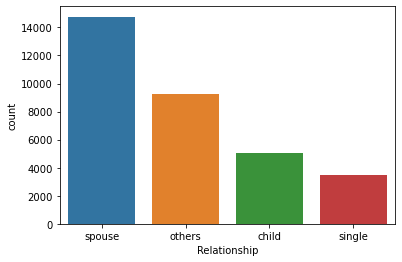

In [29]:
sns.countplot(x ='Relationship', data = df)
plt.show()

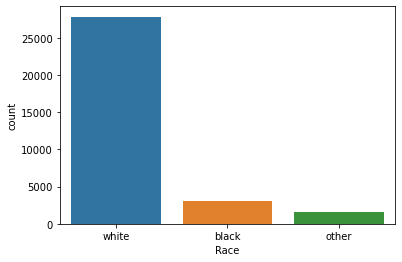

In [30]:
sns.countplot(x ='Race', data = df)
plt.show()

NO of white people are in high range.

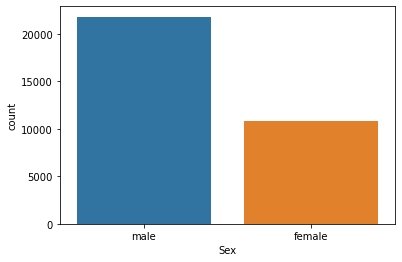

In [31]:
sns.countplot(x ='Sex', data = df)
plt.show()

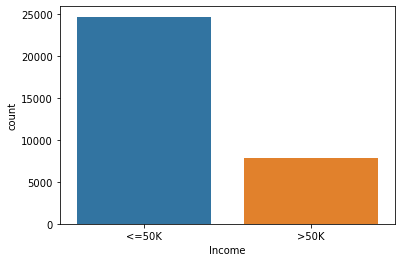

In [32]:
sns.countplot(x ='Income', data = df)
plt.show()

we can visulise that 70:30 ratio of lower then 50 income and higher then 50k income

In [33]:
df['Income'].value_counts(normalize=True)*100

<=50K    75.918305
>50K     24.081695
Name: Income, dtype: float64

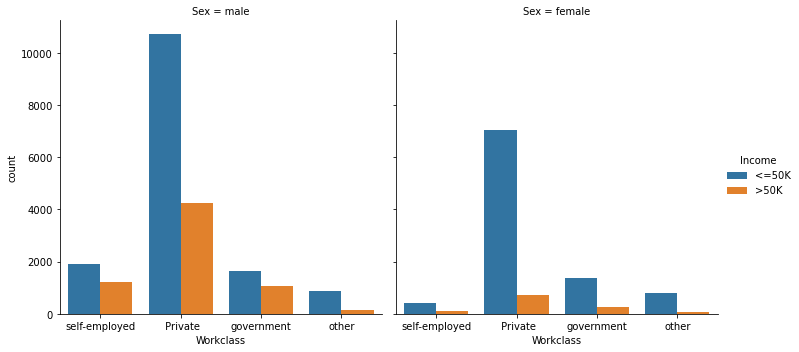

In [34]:
sns.catplot(x ='Workclass', hue ='Income',
kind ='count', col ='Sex', data = df)

In male,

High number of objection are from private sector

comperitively self-employed have high income

government employee have 60:40 ratio for more then 50k Income.
    
    
In Female,

High number of objection are from private sector

comperitively self-employed have high income

government employee have 60:40 ratio for more then 50k Income

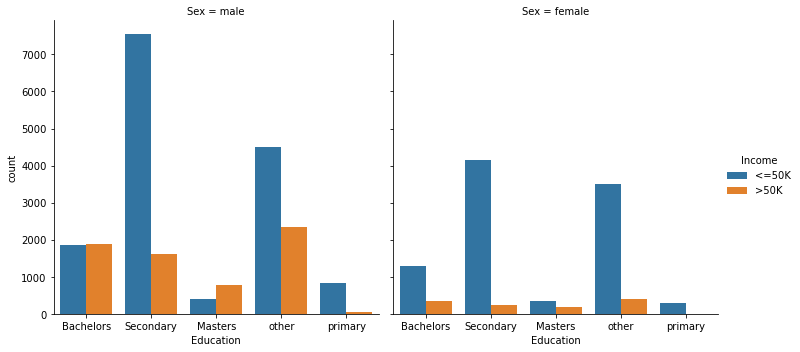

In [35]:
sns.catplot(x ='Education', hue ='Income',
kind ='count', col ='Sex', data = df)

For male

Bachelors person have equal chances for income more then 50k

master degree holder person have very high chances for more then 50k income

primary educated person have very low chances for more then 50k income


For Female:
    

Bachelors person have good chances for income more then 50k

master degree holder person have high chances for more then 50k income

primary educated person have very low chances for more then 50k income

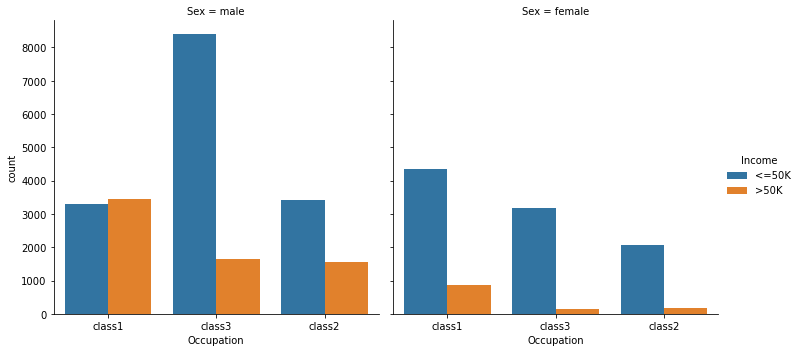

In [36]:
sns.catplot(x ='Occupation', hue ='Income',
kind ='count', col ='Sex', data = df)

FOR Male:
    
For class 1 people have higher chances for more then 50k income

class 3 people have low chances for more then 50k income

For Female:

Class 3 people have very very low chance for more then 50k income


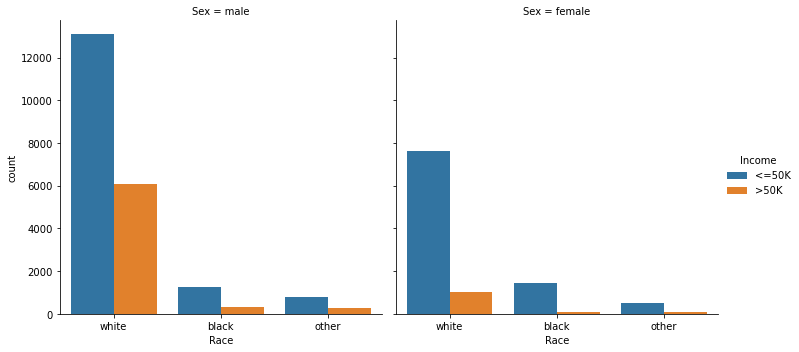

In [37]:
sns.catplot(x ='Race', hue ='Income',
kind ='count', col ='Sex', data = df)

White people have higher chances for more then 50k income while black people have low chances for more then 50k income

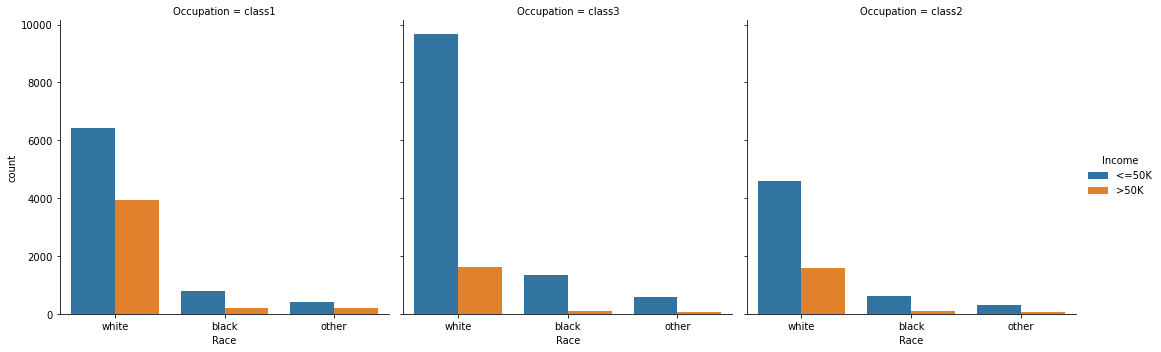

In [38]:
sns.catplot(x ='Race', hue ='Income',
kind ='count', col ='Occupation', data = df)

Most of white person have class 1 job with good income while black people have higher no in class 3 job

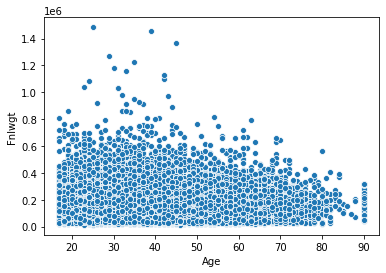

In [39]:
sns.scatterplot(x='Age',y='Fnlwgt',data=df)

Final weight is decrease as age is going to increase

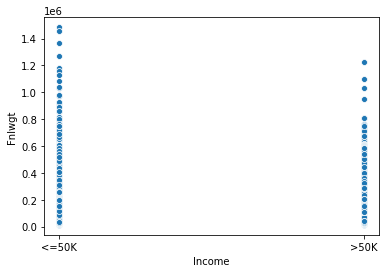

In [40]:
sns.scatterplot(x='Income',y='Fnlwgt',data=df)

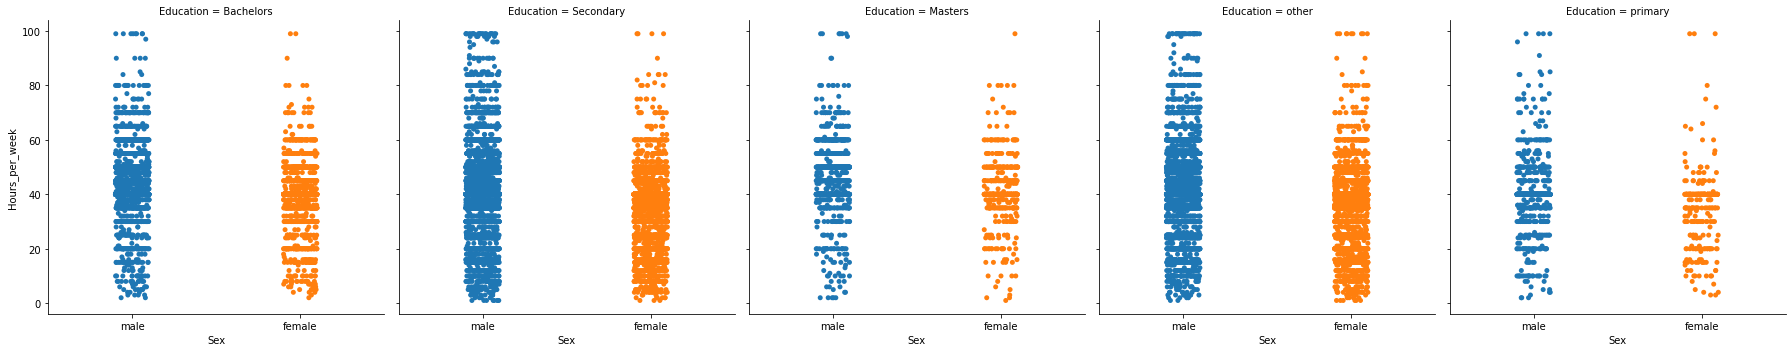

In [41]:
sns.catplot(x ='Sex',y ='Hours_per_week', col ='Education', data = df)

Secondary education people have comparatively high no of hour work /week 

Master education person have low no of working hours

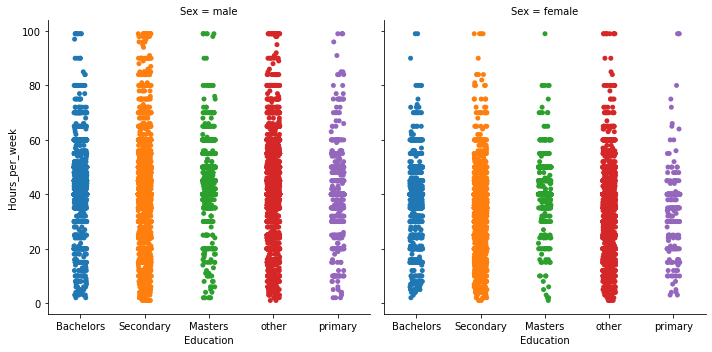

In [42]:
sns.catplot(x ='Education',y ='Hours_per_week', col ='Sex', data = df)

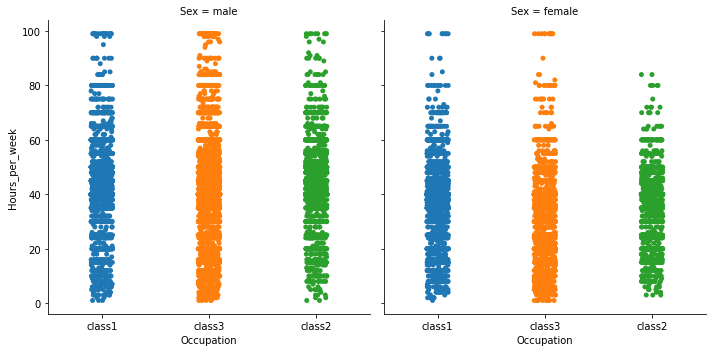

In [43]:
sns.catplot(x ='Occupation',y ='Hours_per_week', col ='Sex', data = df)

Class 3 person have higher working hours

 as compare to male, Female have low working hours in every class

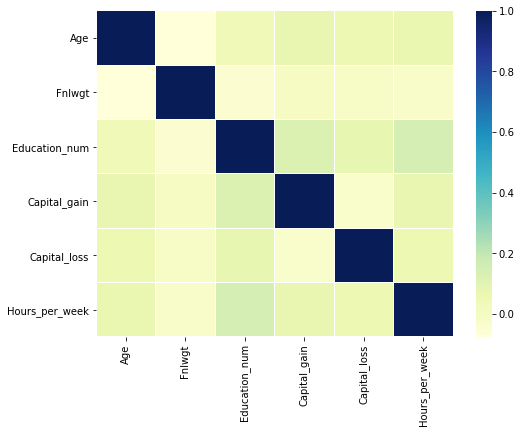

In [44]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(),vmax=1,linewidth=0.1,cmap='YlGnBu')
plt.xticks(rotation=90)
plt.show()

In [45]:
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,self-employed,83311,Bachelors,13,married,class1,spouse,white,male,0,0,13,United-States,<=50K
1,38,Private,215646,Secondary,9,other,class3,others,white,male,0,0,40,United-States,<=50K
2,53,Private,234721,Secondary,7,married,class3,spouse,black,male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,married,class1,spouse,black,female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,married,class1,spouse,white,female,0,0,40,United-States,<=50K


Let we encode all catagorical value for further process

In [46]:
from sklearn.preprocessing import LabelEncoder

lb= LabelEncoder()
df['Workclass'] = lb.fit_transform(df['Workclass'])
df['Education'] = lb.fit_transform(df['Education'])
df['Marital_status'] = lb.fit_transform(df['Marital_status'])
df['Relationship'] = lb.fit_transform(df['Relationship'])
df['Occupation'] = lb.fit_transform(df['Occupation'])
df['Race'] = lb.fit_transform(df['Race'])
df['Sex'] = lb.fit_transform(df['Sex'])
df['Native_country'] = lb.fit_transform(df['Native_country'])
df['Income'] = lb.fit_transform(df['Income'])

df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,3,83311,0,13,0,0,3,2,1,0,0,13,39,0
1,38,0,215646,2,9,1,2,1,2,1,0,0,40,39,0
2,53,0,234721,2,7,0,2,3,0,1,0,0,40,39,0
3,28,0,338409,0,13,0,0,3,0,0,0,0,40,5,0
4,37,0,284582,1,14,0,0,3,2,0,0,0,40,39,0


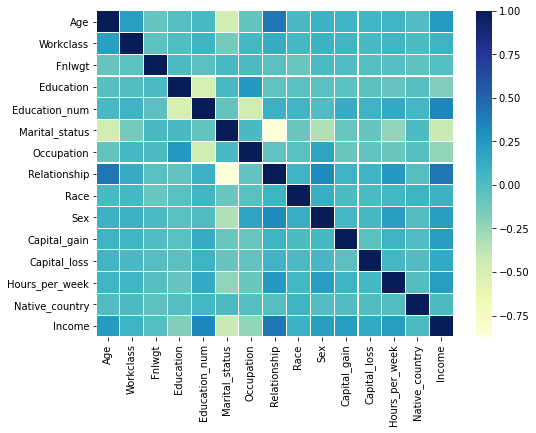

In [47]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(),vmax=1,linewidth=0.1,cmap='YlGnBu')
plt.xticks(rotation=90)
plt.show()

Age have relation with workclass and relationship

income have relation with education, relationship

Occupation have relation with education


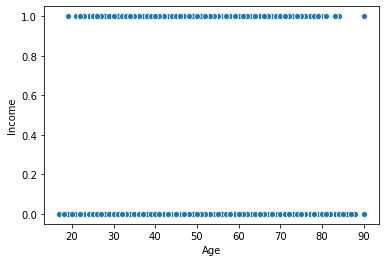

In [48]:
sns.scatterplot(x='Age',y='Income',data=df)

In [49]:
from scipy.stats import zscore

#di=df.columns
z_score=zscore(df)
print(df.shape)
df_1=df.loc[(z_score<3).all(axis=1)]
print(df_1.shape)

(32560, 15)
(30106, 15)


By using z-score technique, i am going to remove outliers which can affect our model

In [50]:
df_1.skew()

#data which is highly skewed 
#workclass, education, capital gain, capital loss, native country, race

Age                0.493674
Workclass          1.592295
Fnlwgt             0.633927
Education         -0.649791
Education_num     -0.323823
Marital_status     0.247166
Occupation        -0.102034
Relationship      -0.289512
Race              -2.304599
Sex               -0.680566
Capital_gain       4.961554
Capital_loss      29.625625
Hours_per_week    -0.406818
Native_country    -3.663786
Income             1.341286
dtype: float64

In [51]:
from scipy.stats import boxcox

for col in df_1:
    if df_1[col].skew()>=1.00:
        df_1[col]=np.cbrt(df_1[col]) 
    if df_1[col].skew()<= -2.00:
        df_1[col]=np.power(df_1[col],2)
        
#remove skewness using cuberoot and power transformation

<ipython-input-51-68c80349d89b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1[col]=np.cbrt(df_1[col])
<ipython-input-51-68c80349d89b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1[col]=np.power(df_1[col],2)


C:\Users\Kishan\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


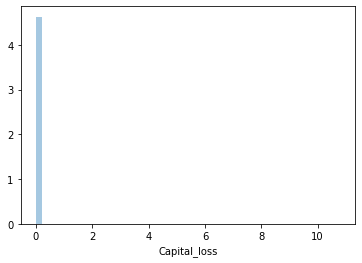

In [52]:
sns.distplot(df_1['Capital_loss'])
#Right Skewed

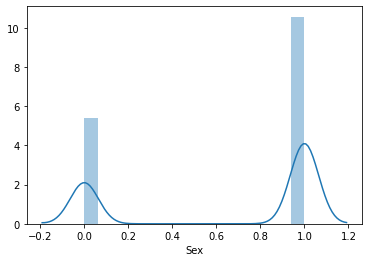

In [53]:
sns.distplot(df_1['Sex'])
#Left Skewed

### MODEL BUILDING

In [54]:
x =df_1.drop('Income',axis=1)
y =df_1['Income']

Scalling data for better accuracy

In [55]:
STD=StandardScaler()
x=STD.fit_transform(x)

split the data in 2 sets of training and testing

In [56]:
x_train,x_test,y_train,y_test=train_test_split(x,y)


In [57]:
lg=LogisticRegression()

In [58]:
for i in range(1,500):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=i)
    lg.fit(x_train,y_train)
    pred_test=lg.predict(x_test)
    pred_train=lg.predict(x_train)
    if round(accuracy_score(y_test,pred_test)*100,1)==round(accuracy_score(y_train,pred_train)*100,1):
        print('Random state',i,'score')
        print('test score',accuracy_score(y_test,pred_test)*100)
        print('train score',accuracy_score(y_train,pred_train)*100)

Random state 14 score
test score 84.50680836931252
train score 84.46271383491114
Random state 38 score
test score 84.45699103287944
train score 84.51253944527487
Random state 52 score
test score 84.54001992693458
train score 84.50008304268394
Random state 90 score
test score 84.52341414812355
train score 84.50423517688091
Random state 96 score
test score 84.54001992693458
train score 84.47517023750207
Random state 100 score
test score 84.45699103287944
train score 84.5083873110779
Random state 112 score
test score 84.47359681169047
train score 84.5083873110779
Random state 123 score
test score 84.4902025905015
train score 84.49593090848695
Random state 135 score
test score 84.47359681169047
train score 84.46271383491114
Random state 137 score
test score 84.54001992693458
train score 84.46686596910811
Random state 174 score
test score 84.50680836931252
train score 84.48347450589603
Random state 192 score
test score 84.47359681169047
train score 84.52084371366882
Random state 211 score
t

In [59]:
svc=SVC()
rndf = RandomForestClassifier()
dtc=DecisionTreeClassifier()
gb=GaussianNB()
knn=KNeighborsClassifier()
sgdc = SGDClassifier()

In [60]:
def fun(f):
    f.fit(x_train,y_train)
    pred=f.predict(x_test)
    print('Score',f.score(x_train,y_train))
    print('Accuracy Score',accuracy_score(y_test,pred)*100)
    print('Confusion Matrix\n',confusion_matrix(y_test,pred))
    print('Classification Report\n',classification_report(y_test,pred))
    print('F1 score',f1_score(y_test,pred)*100)

LOGISTIC REGRESSION

In [61]:
fun(lg)

Score 0.844170403587444
Accuracy Score 84.90534706077715
Confusion Matrix
 [[4403  322]
 [ 587  710]]
Classification Report
               precision    recall  f1-score   support

         0.0       0.88      0.93      0.91      4725
         1.0       0.69      0.55      0.61      1297

    accuracy                           0.85      6022
   macro avg       0.79      0.74      0.76      6022
weighted avg       0.84      0.85      0.84      6022

F1 score 60.9703735508802


SUPPORT VECTOR CLASSIFIER

In [62]:
fun(svc)

Score 0.859118086696562
Accuracy Score 85.70242444370642
Confusion Matrix
 [[4492  233]
 [ 628  669]]
Classification Report
               precision    recall  f1-score   support

         0.0       0.88      0.95      0.91      4725
         1.0       0.74      0.52      0.61      1297

    accuracy                           0.86      6022
   macro avg       0.81      0.73      0.76      6022
weighted avg       0.85      0.86      0.85      6022

F1 score 60.84583901773534


RANDOM FOREST CLASSIFIER

In [63]:
fun(rndf)
pred=rndf.predict(x_test)

Score 0.9998754359740907
Accuracy Score 85.45333776154102
Confusion Matrix
 [[4374  351]
 [ 525  772]]
Classification Report
               precision    recall  f1-score   support

         0.0       0.89      0.93      0.91      4725
         1.0       0.69      0.60      0.64      1297

    accuracy                           0.85      6022
   macro avg       0.79      0.76      0.77      6022
weighted avg       0.85      0.85      0.85      6022

F1 score 63.801652892561975


DECISION TREE CLASSIFIER

In [64]:
fun(dtc)

Score 0.9998754359740907
Accuracy Score 80.78711391564264
Confusion Matrix
 [[4110  615]
 [ 542  755]]
Classification Report
               precision    recall  f1-score   support

         0.0       0.88      0.87      0.88      4725
         1.0       0.55      0.58      0.57      1297

    accuracy                           0.81      6022
   macro avg       0.72      0.73      0.72      6022
weighted avg       0.81      0.81      0.81      6022

F1 score 56.61792275965504


GAUSSIAN NB CLASSIFIER

In [65]:
fun(gb)

Score 0.7711343630626142
Accuracy Score 76.71869810694122
Confusion Matrix
 [[3560 1165]
 [ 237 1060]]
Classification Report
               precision    recall  f1-score   support

         0.0       0.94      0.75      0.84      4725
         1.0       0.48      0.82      0.60      1297

    accuracy                           0.77      6022
   macro avg       0.71      0.79      0.72      6022
weighted avg       0.84      0.77      0.79      6022

F1 score 60.19307211811471


KNN CLASSIFIER

In [66]:
fun(knn)

Score 0.881581132702209
Accuracy Score 83.47725008302889
Confusion Matrix
 [[4283  442]
 [ 553  744]]
Classification Report
               precision    recall  f1-score   support

         0.0       0.89      0.91      0.90      4725
         1.0       0.63      0.57      0.60      1297

    accuracy                           0.83      6022
   macro avg       0.76      0.74      0.75      6022
weighted avg       0.83      0.83      0.83      6022

F1 score 59.9275070479259


SGDC CLASSIFIER

In [67]:
fun(sgdc)


Score 0.8313403089187843
Accuracy Score 83.94221188973762
Confusion Matrix
 [[4537  188]
 [ 779  518]]
Classification Report
               precision    recall  f1-score   support

         0.0       0.85      0.96      0.90      4725
         1.0       0.73      0.40      0.52      1297

    accuracy                           0.84      6022
   macro avg       0.79      0.68      0.71      6022
weighted avg       0.83      0.84      0.82      6022

F1 score 51.72241637543684


Ensembel Method

In [68]:
gd=GradientBoostingClassifier()
ad=AdaBoostClassifier()


In [69]:
fun(ad)
pred=ad.predict(x_test)

Score 0.8589104799867132
Accuracy Score 86.54931916306874
Confusion Matrix
 [[4434  291]
 [ 519  778]]
Classification Report
               precision    recall  f1-score   support

         0.0       0.90      0.94      0.92      4725
         1.0       0.73      0.60      0.66      1297

    accuracy                           0.87      6022
   macro avg       0.81      0.77      0.79      6022
weighted avg       0.86      0.87      0.86      6022

F1 score 65.76500422654269


In [70]:
fun(gd)
pred=gd.predict(x_test)

Score 0.8665504069091513
Accuracy Score 86.76519428761209
Confusion Matrix
 [[4461  264]
 [ 533  764]]
Classification Report
               precision    recall  f1-score   support

         0.0       0.89      0.94      0.92      4725
         1.0       0.74      0.59      0.66      1297

    accuracy                           0.87      6022
   macro avg       0.82      0.77      0.79      6022
weighted avg       0.86      0.87      0.86      6022

F1 score 65.7204301075269


CROSS VALIDATION

In [71]:
score=cross_val_score(svc,x,y,cv=5)
print("score of cross validation score for svc", score.mean()*100)
score=cross_val_score(dtc,x,y,cv=5)
print("score of cross validation score for Decisiontreeclassifier",score.mean()*100)
score=cross_val_score(knn,x,y,cv=5)
print("score of cross validation score for knn",score.mean()*100)
score=cross_val_score(gb,x,y,cv=5)
print("score of cross validation score for GausianNB classifier",score.mean()*100)
score=cross_val_score(rndf,x,y,cv=4)
print("score of cross validation score for Randomforest classifier",score.mean()*100)
score=cross_val_score(ad,x,y,cv=4)
print('score of cross validation score for Adaboost classifier',score.mean()*100)


score of cross validation score for svc 85.4946048180422
score of cross validation score for Decisiontreeclassifier 80.91743825206926
score of cross validation score for knn 83.39201591065833
score of cross validation score for GausianNB classifier 77.7685661349894
score of cross validation score for Randomforest classifier 85.06279290205893
score of cross validation score for Adaboost classifier 85.89985036065222


In [72]:
score=cross_val_score(lg,x,y,cv=4)
print("score of cross validation score for Gradientboost classifier",score.mean()*100)

score of cross validation score for Gradientboost classifier 84.4748744187856


In [73]:
score=cross_val_score(sgdc,x,y,cv=4)
print("score of cross validation score for Gradientboost classifier",score.mean()*100)


score of cross validation score for Gradientboost classifier 84.19917987864822


HYPER TUNING

In [74]:
knn1=KNeighborsClassifier(algorithm='brute',n_neighbors=5,p=1,weights='distance')
fun(knn1)

Score 0.9998754359740907
Accuracy Score 83.39422118897376
Confusion Matrix
 [[4255  470]
 [ 530  767]]
Classification Report
               precision    recall  f1-score   support

         0.0       0.89      0.90      0.89      4725
         1.0       0.62      0.59      0.61      1297

    accuracy                           0.83      6022
   macro avg       0.75      0.75      0.75      6022
weighted avg       0.83      0.83      0.83      6022

F1 score 60.53670086819258


p2={'n_estimators':[10,50,100,250,500],'max_depth':[1,2,3,4,5],'max_features':['auto','sqrt','log2']}
gd1=GridSearchCV(gd,p2)
gd1.fit(x,y)
print(gd1.best_params_)

In [75]:
rndf1=RandomForestClassifier(max_depth=5,max_features='sqrt',n_estimators=10)
fun(rndf1)

Score 0.8545922604218569
Accuracy Score 85.90169378943872
Confusion Matrix
 [[4544  181]
 [ 668  629]]
Classification Report
               precision    recall  f1-score   support

         0.0       0.87      0.96      0.91      4725
         1.0       0.78      0.48      0.60      1297

    accuracy                           0.86      6022
   macro avg       0.82      0.72      0.76      6022
weighted avg       0.85      0.86      0.85      6022

F1 score 59.70574276222117


In [76]:
dtc1=DecisionTreeClassifier(criterion='entropy',max_depth=5,max_features='log2',splitter='best')
fun(dtc1)

Score 0.8501494768310912
Accuracy Score 85.43673198272998
Confusion Matrix
 [[4541  184]
 [ 693  604]]
Classification Report
               precision    recall  f1-score   support

         0.0       0.87      0.96      0.91      4725
         1.0       0.77      0.47      0.58      1297

    accuracy                           0.85      6022
   macro avg       0.82      0.71      0.75      6022
weighted avg       0.85      0.85      0.84      6022

F1 score 57.93764988009592


In [77]:
score=cross_val_score(knn1,x,y,cv=4)
print("score of cross validation score for Gradientboost classifier",score.mean()*100)

score of cross validation score for Gradientboost classifier 83.18278001127027


In [78]:
score=cross_val_score(rndf1,x,y,cv=4)
print("score of cross validation score for Gradientboost classifier",score.mean()*100)

score of cross validation score for Gradientboost classifier 85.21559210299384


In [79]:
score=cross_val_score(dtc1,x,y,cv=4)
print("score of cross validation score for Gradientboost classifier",score.mean()*100)

score of cross validation score for Gradientboost classifier 83.33896016682047


Voting Classifier

In [80]:
estimator=[]

estimator.append(('svc',SVC()))
estimator.append(('gd',DecisionTreeClassifier()))
estimator.append(('ad',KNeighborsClassifier()))

In [81]:
voting_hard=VotingClassifier(estimators=estimator,voting='hard')
voting_hard.fit(x_train,y_train)
y_pred=voting_hard.predict(x_test)
print(y_pred)
#usint accuracy score
score=(accuracy_score(y_test,y_pred))
print('hard voting score % d'%score)

[0. 0. 0. ... 0. 0. 0.]
hard voting score  0


In [82]:
y_pred_prob=ad.predict_proba(x_test)[:,1]
y_pred_prob

array([0.48670801, 0.48060193, 0.48283422, ..., 0.41241368, 0.49135054,
       0.47735994])

In [83]:
fpr,tpr,thresolds=roc_curve(y_test,y_pred_prob)
print('ROC Score',roc_auc_score(y_test,pred))

ROC Score 0.7665893208992669


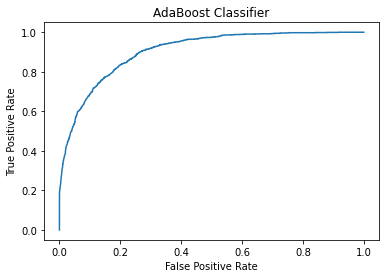

In [84]:
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AdaBoost Classifier')
plt.show()

In [85]:
sd=pd.DataFrame({'column name':['lg','svc','rndf','dtc','gb','knn','sgdc' ,'ad','gd','knn1','rndf1','dtc1']})

In [86]:
sd['score']=[0.84,0.85,0.99,0.99,0.77,0.88,0.83,0.85,0.86,0.99,0.85,0.84]
sd['Accuracy Score']=[84.90,85.70,85.37,80.72,76.72,83.42,84.50,86.54,86.76,83.39,85.58,84.49]
sd['F1 Score']=[60.97,60.84,63.72,56.38,60.19,59.92,60.06,65.76,65.72,60.53,59.59,55.09]
sd['CV Score']=[84.47, 85.49 ,85.06,80.97,77.76,83.39,84.18,85.89,82.16,83.18,85.22,84.18]


In [87]:
sd

,column name,score,Accuracy Score,F1 Score,CV Score
0,lg,0.84,84.90,60.97,84.47
1,svc,0.85,85.70,60.84,85.49
2,rndf,0.99,85.37,63.72,85.06
3,dtc,0.99,80.72,56.38,80.97
4,gb,0.77,76.72,60.19,77.76
5,knn,0.88,83.42,59.92,83.39
6,sgdc,0.83,84.50,60.06,84.18
7,ad,0.85,86.54,65.76,85.89
8,gd,0.86,86.76,65.72,82.16
9,knn1,0.99,83.39,60.53,83.18


In [88]:
import pickle
filename='census_income.pkl'
pickle.dump(ad,open(filename,'wb'))

Here, we dump Adaboost classifier model as it have good accuracy, f1 score and low diffrence 

       Actual  Predict
10227     0.0      0.0
19050     0.0      0.0
18978     0.0      0.0
11539     0.0      0.0
8381      0.0      0.0
...       ...      ...
14100     0.0      0.0
28314     1.0      0.0
15979     0.0      0.0
487       0.0      0.0
20625     0.0      0.0

[6022 rows x 2 columns]


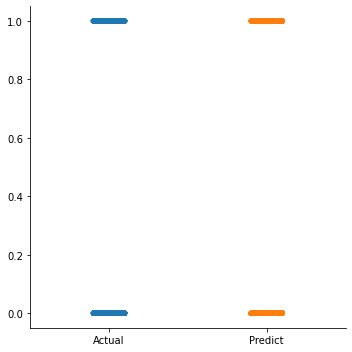

In [89]:
res=pd.DataFrame()
res['Actual']=y_test
res['Predict']=ad.predict(x_test)
print(res)
sns.catplot(data=res)

# THANK YOU